# Multilayer Perceptron


Neural Network / Fall 1399, Iran University of Science and Technology



---



## 1. MLP from Scratch

In this assignment, you will explore and implement the properties of a primary deep learning model called ***multilayer perceptron(MLP)***. Basically, the goal of an MLP is to learn a non-linear mapping from inputs to outputs. We can show this mapping as $y = f(x; \theta)$ , where $x$ is the input and $\theta$ is a vector of all the parameters in the network, which we're trying to learn.  


As you see in the figure, every MLP network consists of an input layer, an output layer, and one or more hidden layers in between. Each layer consists of one or more cells called Neurons. In every Neuron, a dot product between the inputs of the cell and a weight vector is calculated. The result of the dot product then goes through a non-linear function (activation function e.g. $tanh$ or $sigmoid$) and gives us the output of the neuron.



<center>
<img src=https://static.javatpoint.com/tutorial/tensorflow/images/multi-layer-perceptron-in-tensorflow.png width="500" align="center">
</center>


<br>
Thoughout this assignment, inputs will be matrices with the shape of $b \times M$ where $b$ is the batch size and $M$ is the number of features of inputs. <br>
As for the equations, let's compute the output of the $i$th layer:
$$A^i = f(A^{i-1}w^i + b^i)$$

Imagine that $(i-1)$th and $i$th layer have sizes of $n$ and $p$ respectively. The dimensions of weight and bias will be as follows:
<br><br>
$$w^{n\times p} , b^{1\times p}$$
 <br>



Numpy is the only package you're allowed to use for implementing your MLP in this assignment, so let's import it in the cell below! 

In [ ]:
import numpy as np

### 1.1 Activation Functions

Now let's implement some activation functions! Linear, Relu and Sigmoid are the functions that we'll need in this assignment. Note that you should also implement their derivatives since you'll need them later for back-propagation.

In [ ]:
## We've implemented the Linear activation function for you

def linear(x, deriv=False):

  return x if not deriv else np.ones_like(x)

def relu(x, deriv=False):
  """
  Args:
    x: A numpy array of any shape 
    deriv: True or False. determines if we want the derivative of the function or not.
    
  Returns:
    relu_out: A numpy array of the same shape as x. 
      Basically relu function or its derivative applied to every element of x
               
  """

  ########################################
  #     Put your implementation here     #

  relu_out = np.maximum(x, 0) if not deriv else 1 * (x > 0)
  ######################################## 
  
  
  
  return relu_out
  
def  sigmoid(x, deriv=False):
  """
  Args:
    x: A numpy array of any shape 
    deriv: True or False. determines if we want the derivative of the function or not.
    
  Returns:
    sig_out: A numpy array of the same shape as x. 
      Basically sigmoid function or its derivative applied to every element of x
               
  """

  ########################################
  #     Put your implementation here     #

  sig = 1.0 / (1.0 + np.exp(- x))
  sig_out = sig if not deriv else sig * (1 - sig)
  ########################################
  
  
  
  
  
  return sig_out


**Question**: Why do activation functions have to be non-linear? Could any non-linear function be used as an activation function?

<font color=red>Write your answers here</font>

if a linear activation function is used, the derivative of the cost function is a constant with respect to input, so the value of input does not affect the updating of weights. But non-linear activation functions allow backpropagation because they have a derivative function which is related to the inputs. This allows you to model a response variable that varies non-linearly with its explanatory variables. Also, without a non-linear activation function in the network, a NN, no matter how many layers it had, would behave just like a single-layer perceptron, because summing these layers would give you just another linear function. Activation functions such as ReLU, sigmoid and ... can be used as activation functions.

### 1.2 Forward Propagation

Now let's implement our MLP class. This class handles adding layers and doing the forward propagation. Here are the attributes of this class:
<br> -  __parameters__: A list of dictionaries in the form of _{'w': weight, 'b': bias}_ where _weight_ and _bias_ are weight matrix and bias vector of a layer.
<br>- __act_funcs__: A list of activation functions used in the corresponding layer.
<br>- __activations__: A list of matrices each corresponding to the output of each layer.
<br>- __weighted_ins__: A list of matrices each corresponding to the weighted input of each layer. Weighted input, as the name suggests, is layer's input multiplied by layer's weights and added to layer's bias. Which then goes into the layer's activation function to compute the layer's activations(outputs)!
<br> Note that we store weighted inputs and outputs of the layers because we'll need them later for implementing the back-propagation algorithm. 


You only need to complete the _feed_forward_ function in the MLP class. This function performs forward propagation on the input.

In [ ]:
class MLP:

  def __init__(self, input_dim):
    """
  Args:
    input_dim: An integer determining the inpu dimension of the MLP
               
  """

    self.input_dim = input_dim
    self.parameters = []
    self.act_funcs = []
    self.activations = []
    self.weighted_ins = []

  def add_layer(self, layer_size, act_func=linear):
    """
    Add layers to the MLP using this function
  Args:
    layer_size: An integer determinig the number of neurons in the layer
    act_func: A function applied to the units in the layer 
    
               
  """
    ### Size of the previous layer of mlp
    prev_size = self.input_dim if not self.parameters else self.parameters[-1]['w'].shape[-1]

    ### Weight scale used in He initialization
    weight_scale = np.sqrt(2/prev_size)
    ### initializing the weights and bias of the layer
    weight = np.random.normal(size=(prev_size, layer_size))*weight_scale
    bias = np.ones(layer_size) *0.1
    ### Add weights and bias of the layer to the parameters of the MLP
    self.parameters.append({'w': weight, 'b': bias})
    ### Add the layer's activation function 
    self.act_funcs.append(act_func)



  def feed_forward(self, X):
    """
    Propagate the inputs forward using this function
  Args:
    X: A numpy array of shape (b, input_dim) where b is the batch size and input_dim is the dimension of the input
    
  Returns:
    mlp_out: A numpy array of shape (b, out_dim) where b is the batch size and out_dim is the dimension of the output

    Hint: Don't forget to store weighted inputs and outputs of each layer in self.weighted_ins and self.activations respectively
               
  """
    self.activations = []
    self.weighted_ins = []
    mlp_out = X
    ########################################
    #     Put your implementation here     #
    
    for layer in range(len(self.parameters)):
      mlp_out = np.dot(mlp_out, self.parameters[layer]['w']) + self.parameters[layer]['b']
      self.weighted_ins.append(mlp_out)

      mlp_out = self.act_funcs[layer](mlp_out)
      self.activations.append(mlp_out)
      
    ######################################## 
    
    

    return mlp_out


__Question__: In the _add_layer_ function of the MLP class, we used a method called _He initialization_ to initialize the weights. Explain how this method can help with the training of an MLP?


<font color=red>Write your answers here</font>

Kaiming Initialization, or He Initialization, is an initialization method for neural networks that takes into account the non-linearity of activation functions, such as ReLU activations.
A proper initialization method should avoid reducing or magnifying the magnitudes of input signals exponentially.

It finds a good variance for the distribution from which the initial parameters are drawn. This variance is adapted to the activation function used and is derived without explicitly considering the type of the distribution. As such, its theorical conclusions hold for any type of distribution of the determined variance. That is, a zero-centered Gaussian with standard deviation of $\sqrt{\frac{2}{n_l}}$. Biases are initialized at 0.

### 1.3 Loss Function

In the previous sections, we implemented an MLP that accepts an input $x$ and propagates it forward and produces an output $\hat{y}$. The next step in implementing our MLP is to see how good our network's output $\hat{y}$ is compared to the target output $y$! This is where the loss function comes in. This function gets $y$ and $\hat{y}$ as its inputs and returns a scaler as its output. This scaler indicates how good current parameters of the network are. <br>
the choice of this function depends on the task, e.g regression or binary classification. Since you'll be doing a multiclass classification later in this assignment, let's implement the cross-entropy function. Cross-entropy is the function mostly used for classification tasks but to use it in a multiclass setting, the network's outputs must be passed through a softmax activation function and the target output must be in one-hot encoded format.<br>
<center>
<img src=https://miro.medium.com/max/1838/1*lqHLeRpETQL0Z5lk1euaJA.png width="500" align="center">
</center>
<br>
$$Softmax(\hat{y})_i =  \frac{e^{\hat{y}_i}}{\sum^{C}_j e^{\hat{y}_j}} $$ <br>
$$ Cross Entropy(y, \hat{y}) = -\sum_i^C {y_i log(Softmax(\hat{y})_i)}$$
Where $y$ and $\hat{y}$ are two one-hot encoded vectors. $y$ is a single target label and $\hat{y}$ is a single output.<br>
Now let's first implement the softmax activation function! Note that the above formulas are for a single sample, however you should implement the batch version!



In [ ]:
def softmax(y_hat):
  """
    Apply softmax to the inputs
  Args:
    y_hat: A numpy array of shape (b, out_dim) where b is the batch size and out_dim is the output dimension of the network(number of classes) 
    
  Returns:
    soft_out: A numpy array of shape (b, out_dim)
               
  """
  
  ########################################
  #     Put your implementation here     #

  soft_out = np.array([np.exp(i) / np.sum(np.exp(i)) for i in y_hat])
  ########################################

  return soft_out


Now implement the categorical cross-entropy function ("categorical" refers to multiclass classification). Note that the inputs are in batches, so the loss of a batch of samples will be the average of losses of samples in the batch.

In [ ]:
def categorical_cross_entropy(y, y_soft):
  """
    Compute the categorical cross entropy loss
  Args:
    y: A numpy array of shape (b, out_dim). Target labels of network.
    y_soft: A numpy array of shape (b, out_dim). Output of the softmax activation function
    
  Returns:
    loss: A scaler of type float. Average loss over a batch.

  Hint: Use np.mean to compute average loss of a batch
               
  """

  ########################################
  #     Put your implementation here     #
  loss = np.mean(- np.sum(y * np.log(y_soft), axis=1))
  ########################################

  return loss

Great! You have implemented both softmax and categorical cross-entropy functions. Now instead of applying softmax activation function to the output layer of the MLP and then using categorical cross-entropy as loss function, we can merge these two steps and make a softmax categorical cross-entropy loss function and use linear activation function in the output layer! The reason behind this is that the gradient of the softmax categorical cross-entropy loss with respect to the MLP's output is efficiently calculated as:
<br>

$$ Softmax(\hat{y}) - y$$

for a single sample. Here $\hat{y}$ is the MLP's output and $y$ is the target output (labels).<br>


Now let's implement the softmax categorical cross-entropy function!

In [ ]:
def softmax_categorical_cross_entropy(y, y_hat, return_grad=False):
  """
    Compute the softmax categorical cross entropy loss
  Args:
    y: A numpy array of shape (b, out_dim). Target labels of network.
    y_hat: A numpy array of shape (b, out_dim). Output of the output layer of the network
    return_grad: If True return gradient of the loss with respect to y_hat. If False just return the loss
    
  Returns:
    loss: A scaler of type float. Average loss over a batch.
               
  """
  
  y_soft = softmax(y_hat)
  
  if not return_grad:
    loss = categorical_cross_entropy(y, y_soft)
    return loss
  else:
    loss_grad = (y_soft - y)/y.shape[0]
    return loss_grad


### 1.4 Back-Propagation

After calculating the loss of the MLP, we need to propagate this loss back to the hidden layers in order to calculate the gradient of the loss with respect to the weights and biases of the network. The algorithm used to calculate these gradients is called back-propagation or simply backprop. Backprop uses chain rule to compute the gradients of the network parameters. Now let's go over the steps of this algorithm (This is the fully matrix-based version):
- calculate gradient of the loss with respect to $\hat{y}$
<br> $g \longleftarrow \nabla_\hat{y} Loss$ 
- for each layer $L$ starting from the ouput layer: <br>
&emsp;&emsp; $g \longleftarrow g \odot f^\prime(weightedInput^{(L)})$ &emsp; ($weightedInput^{(L)}$ is the weighted input of $L$th layer and $f$ is the activation function)<br>
&emsp;&emsp; $\nabla_{b^{(L)}}Loss \longleftarrow \sum_i^{batch} {g_i}$ <br>
&emsp;&emsp; $\nabla_{w^{(L)}}Loss \longleftarrow output^{(L-1)T}g$ &emsp; ($output^{(L-1)}$ is the output of $(L-1)$th layer ) <br>
&emsp;&emsp; $g \longleftarrow gw^{(L)T}$

Check [this](http://neuralnetworksanddeeplearning.com/chap2.html) for a detailed explanation of the back-propagation algorithm.

Now implement the back-propagation algorithm!

In [ ]:
def mlp_gradients(mlp, loss_function, x, y):
  """
    Compute the gradient of loss with respect to mlp's weights and biases
  Args:
    mlp: An object of MLP class
    loss_function: A function used as loss function of the MLP
    x: A numpy array of shape (batch_size, input_dim). The MLP's input
    y: A numpy array of shape (batch_size, num_classes). Target labels
    
  Returns:
    gradients: A list of dictionaries {'w': dw, 'b': db} corresponding to the dictionaries in mlp.parameters
        dw is the gradient of loss with respect to the weights of the layer 
        db is the gradient of loss with respect to the bias of the layer 
               
  """  

  gradients = []

  ### get the output of the network
  y_hat = mlp.activations[-1]
  num_layers = len(mlp.parameters)

  ### compute gradient of the loss with respect to network output
  g = loss_function(y, y_hat, return_grad=True)

  ### You'll need the input in the last step of backprop so let's make a new list with x in the beginning
  activations = [x] + mlp.activations 
  
  for i in reversed(range(num_layers)):
    ########################################
    #     Put your implementation here     #
    g = np.multiply(g, mlp.act_funcs[i](mlp.weighted_ins[i], deriv=True))
    db = np.sum(g, axis=0, keepdims=True)
    dw = np.dot(activations[i].T, g)
    g = np.dot(g, mlp.parameters[i]['w'].T)
    gradients = [{'w': dw, 'b': db}] + gradients
    ########################################
    
    
  return gradients


### 1.5 Optimizaion

Now that we've computed the gradients of the parameters of our MLP, we should optimize these parameters using the gradients in order for the network to produce better outputs. <br> 
Gradient descent is an optimizaion method that iteratively moves the paramters in the oposite direction of their gradients. Below is the update rule for gradient descent:
<br><br>
$$ w \leftarrow w - \alpha \nabla_wLoss$$ 
<br>
Where $\alpha$ is the learning rate hyperparameter.<br>
There are three main variants of gradient descent: stochastic gradient descent, mini-batch gradient descent and batch gradient descent. <br>
Mini-batch gradient descent is the most used variant in practice and that's what we'll use in this assignment



Let's perform a step of gradient descent on a simple MLP!

In [ ]:
x = np.random.normal(size=(16, 10))
y = np.eye(16)
lr = 0.1
### Define the mlp 
mlp = MLP(x.shape[-1])
mlp.add_layer(16)
mlp.add_layer(8)
mlp.add_layer(y.shape[-1])
### compute mlp's output
y_hat = mlp.feed_forward(x)
### print current loss
print("loss before gradient descent: ", softmax_categorical_cross_entropy(y, y_hat))
### Compute gradients of the mlp's parameters 
grads = mlp_gradients(mlp, softmax_categorical_cross_entropy, x, y)
### perform gradient descent
mlp.parameters = [{'w':p['w']-lr*g['w'], 'b':p['b']-lr*g['b']} for g, p in zip(grads, mlp.parameters)]
### compute mlp's output again after gradeint descent
y_hat = mlp.feed_forward(x)
### print loss after gradient descent
print("loss after gradient descent: ", softmax_categorical_cross_entropy(y, y_hat))

loss before gradient descent:  4.7838484415670415
loss after gradient descent:  3.515466098132811


__Question__: Do gradient descent steps always decrease the loss? why?   (Hint: toy with the learning rate in the axample above!)

<font color=red>Write your answers here</font>

Not always. Whether the loss decreases depends on your step size (learning rate). If learning rate is too large, then loss(t) may be greater than lost(t-1), indicating that you overshot the local minimum and increased the loss.

When plotted, the results of such a sensitivity analysis often show a “U” shape, where loss decreases (performance improves) as the learning rate is decreased with a fixed number of training epochs to a point where loss sharply increases again because the model fails to converge.

Instead of using gradient descent, we'll be using an extention of it called gradient descent with momentum. So instead of updating the parameters based only on current gradients, we take into account the gradients from previous steps! This way, parameter updates will have lower variance and convergence will be faster and smoother. 
$$ v \leftarrow \gamma  v - \alpha \nabla_wLoss$$ 
$$ w \leftarrow w + v$$
Where $w$ denotes mlp's weights and $v$ is called velocity which is basically a weighted average of all previous gradients.<br>
Here $\gamma$ determines how fast effects of the previous gradients fade and $\alpha$ is the learning rate.

Now let's implement the SGD class!

In [ ]:
class SGD:

  def __init__(self, lr=0.01, momentum=0.9):
    """
  Args:
    lr: learning rate of the SGD optimizer
    momentum: momentum of the SGD optimizer

    Hint: velocity should be a list of dictionaries just like mlp.parameters
               
  """ 

    self.lr = lr
    self.momentum = momentum
    ### initialize velocity
    self.velocity = []
  
  def step(self, parameters, grads):

    """
    Perform a gradient descent step
  Args:
    parameters: A list of dictionaries {'w': weights , 'b': bias}. MLP's parameters. 
    grads: A list of dictionaries {'w': dw, 'b': db}. gradient of MLP's parameters. Basically the output of "mlp_gradients" function you implemented!
    
  Returns:
    Updated_parameters: A list of dictionaries {'w': weights , 'b': bias}. mlp's parameters after performing a step of gradient descent. 
               
  """

    ########################################
    #     Put your implementation here     #

    if len(self.velocity) == 0:
      self.velocity = grads.copy()
      for v in self.velocity:
        v['w'] = 0
        v['b'] = 0
    
    self.velocity = [{'w':self.momentum*v['w'] - self.lr*g['w'],
                      'b':self.momentum*v['b'] - self.lr*g['b']} for g, v in zip(grads, self.velocity)]
    Updated_parameters = [{'w':p['w'] + v['w'],
                           'b':p['b'] + v['b']} for v, p in zip(self.velocity, parameters)]
    ######################################## 

    

    return Updated_parameters
    

## 2. Classifying Kannada Handwritten Digits

In this part of the assignment, you'll use the MLP you implemented in the first part to classify Kannada handwritten digits!<br> This dataset consists of 60000 images of handwritten digits in Kannada script.<br>
You can check [this](https://github.com/vinayprabhu/Kannada_MNIST) github repository for more information about the dataset.

### __Please Unzip the kannada file first__

In [ ]:
# Code to read csv file into Colaboratory:!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
train_id = '1LBzj291bzQmJqGE1oDtAZ2pW85lTVZZ1'
downloaded = drive.CreateFile({'id':train_id})
downloaded.GetContentFile('train.zip')

In [ ]:
!unzip train.zip

Archive:  train.zip
  inflating: train.csv               


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
train = pd.read_csv('train.csv')

In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


As you can see, the first column of the dataframe is the label, and the rest of the columns are the pixels. Let's put the dataset in numpy arrays. Also, we must normalize the pixel values to [0,1] range to help the convergence of our MLP model.

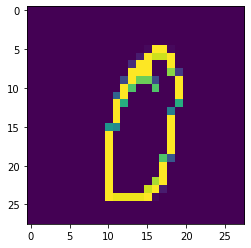

In [ ]:
x = train.values[:, 1:]/255.
y = train.values[:, 0]
plt.imshow(x[10000].reshape(28, 28))

As we are doing a multiclass classification, the labels must be in one-hot encoded format. <br>

In [ ]:
def one_hot_encoder(y):

  y = y.reshape(-1)
  num_samples = y.shape[0]
  max_label = np.max(y)
  one_hot = np.zeros((num_samples, max_label+1))
  one_hot[np.arange(num_samples),y] = 1
  
  return one_hot


Now let's transform the labels into one-hot encoded format!

In [ ]:
y = one_hot_encoder(y)

We've implemented the _get_mini_batches_ function below. This function transforms the dataset into multiple batches. We need this function because we'll be doing mini-batch gradient descent. 

In [ ]:
import math

def get_mini_batches(x, y, batch_size, shuffle=True):

  idx = list(range(len(x)))
  np.random.shuffle(idx)
  steps = math.ceil(len(x)/batch_size)
  x, y = x[idx, :], y[idx, :]
  for i in range(steps):
    yield (x[i*batch_size: (i+1)*batch_size], y[i*batch_size: (i+1)*batch_size])



Evaluation metrics are used to measure the performance of a model after training. The choice of this metric depends on factors like the nature of the task (e.g classification or regression) or a dataset's characteristics (e.g class imbalance). For multiclass classification with balanced classes, accuracy is a reasonable choice.


We've implemented the accuracy function in the cell below:

In [ ]:
def accuracy(y, y_hat):

  return np.mean(np.argmax(y, axis=-1)==np.argmax(y_hat, axis=-1))
  

Now let's split the dataset into train and validatoin sets:

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, stratify=y)

Everything is now ready for training our MLP! Create your MLP model in the cell bellow. The choice of the number of layers, their sizes and their activation functions is up to you.




In [ ]:

mlp = MLP(x_train.shape[-1])

########################################
#     Put your implementation here     #

mlp.add_layer(392, act_func=relu)
mlp.add_layer(49, act_func=relu)
mlp.add_layer(y_train.shape[-1], act_func=relu)
########################################




Let's set some hyper-parameters. Feel free to change these hyper-parameters however you see fit!

In [ ]:
epochs = 60
Batch_size = 256
sgd_lr = 0.005
sgd_momentum = 0.9

Now let's train the network!

In [ ]:
from tqdm import tqdm_notebook
### Defining a optimizer
optimizer = SGD(lr=sgd_lr, momentum=sgd_momentum)

train_loss, val_loss, train_accs, val_accs = [], [], [], []

for i in range(epochs):
  mini_batches = get_mini_batches(x_train, y_train, Batch_size)
  for xx, yy in tqdm_notebook(mini_batches, desc='epoch {}'.format(i+1)):

    ### forward propagation
    mlp.feed_forward(xx)
    ### compute gradients
    grads = mlp_gradients(mlp, softmax_categorical_cross_entropy, xx, yy)
    ### optimization
    mlp.parameters = optimizer.step(mlp.parameters, grads)
    
  y_hat = mlp.feed_forward(x_train)
  y_hat_val = mlp.feed_forward(x_val)
  val_loss.append(softmax_categorical_cross_entropy(y_val, y_hat_val))
  train_loss.append(softmax_categorical_cross_entropy(y_train, y_hat))
  train_acc = accuracy(y_train, y_hat)*100
  val_acc = accuracy(y_val, y_hat_val)*100
  train_accs.append(train_acc)
  val_accs.append(val_acc)
  print("training acc: {:.2f} %".format(train_acc))
  print("test acc: {:.2f} %".format(val_acc))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':



training acc: 93.14 %
test acc: 93.11 %



training acc: 94.93 %
test acc: 94.89 %



training acc: 95.74 %
test acc: 95.71 %



training acc: 96.12 %
test acc: 95.95 %



training acc: 96.42 %
test acc: 96.24 %



training acc: 96.70 %
test acc: 96.40 %



training acc: 96.92 %
test acc: 96.53 %



training acc: 97.03 %
test acc: 96.65 %



training acc: 97.28 %
test acc: 96.72 %



training acc: 97.34 %
test acc: 96.91 %



training acc: 97.46 %
test acc: 96.93 %



training acc: 97.57 %
test acc: 97.05 %



training acc: 97.69 %
test acc: 97.11 %



training acc: 97.76 %
test acc: 97.23 %



training acc: 97.84 %
test acc: 97.19 %



training acc: 97.97 %
test acc: 97.23 %



training acc: 98.04 %
test acc: 97.31 %



training acc: 98.16 %
test acc: 97.30 %



training acc: 98.29 %
test acc: 97.35 %



training acc: 98.32 %
test acc: 97.45 %



training acc: 98.43 %
test acc: 97.51 %



training acc: 98.48 %
test acc: 97.55 %



training acc: 98.51 %
test acc: 97.59 %



training acc: 98.60 %
test acc: 97.66 %



training acc: 98.70 %
test acc: 97.73 %



training acc: 98.75 %
test acc: 97.71 %



training acc: 98.75 %
test acc: 97.87 %



training acc: 98.82 %
test acc: 97.83 %



training acc: 98.86 %
test acc: 97.89 %



training acc: 98.89 %
test acc: 97.89 %



training acc: 98.94 %
test acc: 97.90 %



training acc: 99.02 %
test acc: 97.93 %



training acc: 99.04 %
test acc: 97.91 %



training acc: 99.09 %
test acc: 97.98 %



training acc: 99.10 %
test acc: 97.99 %



training acc: 99.06 %
test acc: 97.97 %



training acc: 99.14 %
test acc: 97.99 %



training acc: 99.22 %
test acc: 98.07 %



training acc: 99.23 %
test acc: 98.00 %



training acc: 99.29 %
test acc: 98.05 %



training acc: 99.33 %
test acc: 98.08 %



training acc: 99.36 %
test acc: 98.07 %



training acc: 99.32 %
test acc: 98.03 %



training acc: 99.40 %
test acc: 98.11 %



training acc: 99.42 %
test acc: 98.11 %



training acc: 99.44 %
test acc: 98.09 %



training acc: 99.46 %
test acc: 98.12 %



training acc: 99.50 %
test acc: 98.16 %



training acc: 99.46 %
test acc: 98.15 %



training acc: 99.53 %
test acc: 98.15 %



training acc: 99.54 %
test acc: 98.13 %



training acc: 99.54 %
test acc: 98.20 %



training acc: 99.58 %
test acc: 98.22 %



training acc: 99.59 %
test acc: 98.22 %



training acc: 99.61 %
test acc: 98.15 %



training acc: 99.62 %
test acc: 98.23 %



training acc: 99.65 %
test acc: 98.19 %



training acc: 99.66 %
test acc: 98.25 %



training acc: 99.67 %
test acc: 98.25 %



training acc: 99.71 %
test acc: 98.25 %


Let's visualize accuracy and loss for train and validation sets during training:

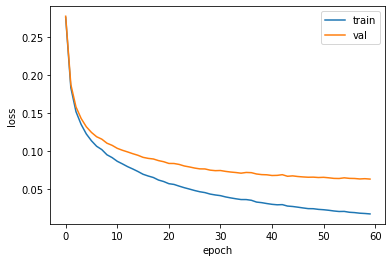

In [ ]:
plt.plot(list(range(len(train_loss))), train_loss, label='train')
plt.plot(list(range(len(val_loss))), val_loss, label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

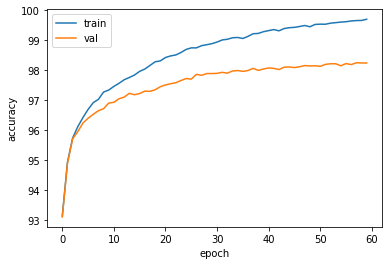

In [ ]:
plt.plot(list(range(len(train_accs))), train_accs, label='train')
plt.plot(list(range(len(val_accs))), val_accs, label='val')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

__Question__: Looking at loss and accuracy plots, how would you describe your model in terms of bias and variance?

For bias and variance you can check <a href="https://medium.com/@itbodhi/bias-and-variance-trade-off-542b57ac7ff4"> This link</a>. 

<font color=red>Write your answers here</font>

My model is approximately Good balance (low bias, low variance) because of low train and test error with low differnce (train error = 0.29%, test error = 1.75% in 60 epochs).

# MLP using tensorflow and keras

In this part you should use keras and tensorflow to implement the exact network that you built in previous section. use the exact paramerters and then classify kannada and report the accuracy. at the end compare the resualt of 2 model you biult and explain it. 

If you need more information about keras and implementation you can check <a href="https://www.machinecurve.com/index.php/2019/07/27/how-to-create-a-basic-mlp-classifier-with-the-keras-sequential-api/"> This link</a>. 

In [ ]:
########################################
#     Put your implementation here     #

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Set the input shape
input_shape = (x_train.shape[-1],)
print(f'Feature shape: {input_shape}')

# Create the model
tf_model = Sequential()
tf_model.add(Dense(392, input_shape=input_shape, activation='relu',
                   kernel_initializer='he_normal', bias_initializer=tf.keras.initializers.Constant(value=0.1)))
tf_model.add(Dense(49, activation='relu',
                   kernel_initializer='he_normal', bias_initializer=tf.keras.initializers.Constant(value=0.1)))
tf_model.add(Dense(y_train.shape[-1], activation='softmax',
                   kernel_initializer='he_normal', bias_initializer=tf.keras.initializers.Constant(value=0.1)))

# Configure the model and start training
tf_model.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.9), metrics=['acc'])
history = tf_model.fit(x_train, y_train, epochs=60, batch_size=256, verbose=1, validation_data=(x_val, y_val))

########################################

Feature shape: (784,)
Epoch 1/60
176/176 [==============================] - 1s 4ms/step - loss: 0.8169 - acc: 0.7954 - val_loss: 0.2786 - val_acc: 0.9287
Epoch 2/60
176/176 [==============================] - 1s 3ms/step - loss: 0.2255 - acc: 0.9403 - val_loss: 0.1944 - val_acc: 0.9465
Epoch 3/60
176/176 [==============================] - 1s 3ms/step - loss: 0.1735 - acc: 0.9518 - val_loss: 0.1620 - val_acc: 0.9553
Epoch 4/60
176/176 [==============================] - 1s 3ms/step - loss: 0.1489 - acc: 0.9577 - val_loss: 0.1456 - val_acc: 0.9593
Epoch 5/60
176/176 [==============================] - 1s 3ms/step - loss: 0.1339 - acc: 0.9617 - val_loss: 0.1354 - val_acc: 0.9622
Epoch 6/60
176/176 [==============================] - 1s 3ms/step - loss: 0.1227 - acc: 0.9649 - val_loss: 0.1261 - val_acc: 0.9640
Epoch 7/60
176/176 [==============================] - 1s 3ms/step - loss: 0.1142 - acc: 0.9672 - val_loss: 0.1208 - val_acc: 0.9666
Epoch 8/60
176/176 [==============================] - 

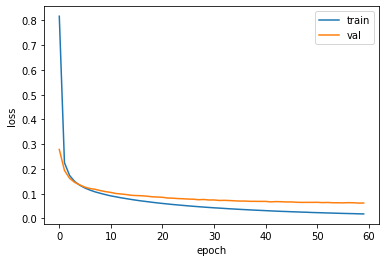

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

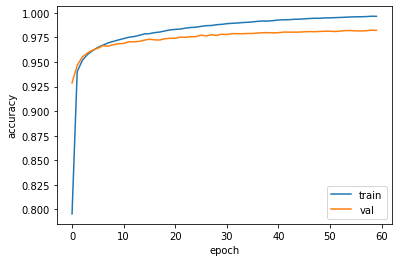

In [ ]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='val')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

I tried as hard as i could to implement keras similar to my MLP implementation. So because my MLP and Keras MLP that i implemented is alike a lot (with equal high parameters that i used), the accuracy and loss of both networks is near each other.